In [3]:

!pip install numpy

  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install keras tensorflow


  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached h5py-3.15.1-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
  Using cached optree-0.17.0-cp310-cp310-win_amd64.whl.metadata (34 kB)
  Using cached ml_dtypes-0.5.3-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib

  Using cached matplotlib-3.10.7-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp310-cp310-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp310-cp310-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [24]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Normalize 

In [25]:
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


to_categorical

In [26]:
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)

before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Architecture

In [27]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer

d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0998 - loss: 2.7950 - val_accuracy: 0.0952 - val_loss: 2.3038
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0986 - loss: 2.3034 - val_accuracy: 0.1014 - val_loss: 2.3030
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0981 - loss: 2.3035 - val_accuracy: 0.1003 - val_loss: 2.3036
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0990 - loss: 2.3036 - val_accuracy: 0.0977 - val_loss: 2.3041
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0992 - loss: 2.3036 - val_accuracy: 0.1003 - val_loss: 2.3036
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0979 - loss: 2.3036 - val_accuracy: 0.1014 - val_loss: 2.3031
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0997 - loss: 2.3036 - val_accuracy: 0.1003 - val_loss: 2.3035
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0989 - loss: 2.3037 - val_accuracy: 0.

In [30]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1000 - loss: 2.3041
test loss:2.3041155338287354
test accuracy:0.10000000149011612
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.09984999895095825, 0.09857500344514847, 0.09812500327825546, 0.0989999994635582, 0.09920000284910202, 0.09794999659061432, 0.0996749997138977, 0.09894999861717224, 0.09884999692440033, 0.10045000165700912], [2.794999599456787, 2.303436040878296, 2.3035147190093994, 2.303619623184204, 2.3035614490509033, 2.303614854812622, 2.3035683631896973, 2.3037161827087402, 2.3036367893218994, 2.3035824298858643], [0.09520000219345093, 0.10140000283718109, 0.10029999911785126, 0.09769999980926514, 0.10029999911785126, 0.10140000283718109, 0.10029999911785126, 0.10249999910593033, 0.10159999877214432, 0.10140000283718109], [2.3038039207458496, 2.3030428886413574, 2.303628444671631, 2.3041367530822754, 2.3036041259765625, 2.3030622005462646, 2.3035314083099365, 2.3027737140655518, 2.3026325

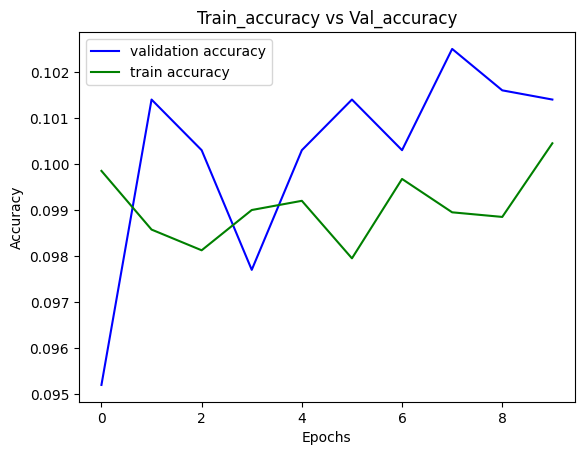

In [32]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

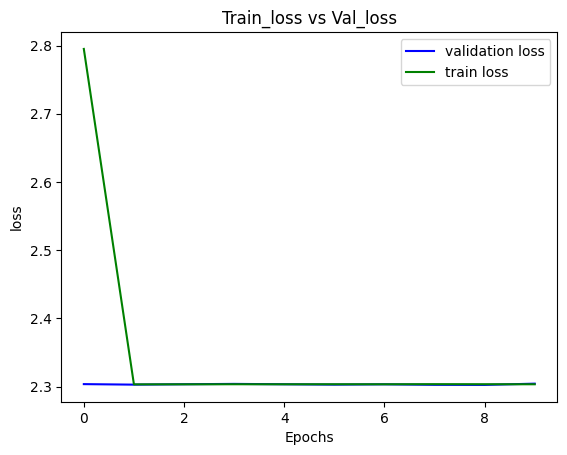

In [33]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [35]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [36]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1491 - loss: 2.4401 - val_accuracy: 0.1789 - val_loss: 2.1056
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1730 - loss: 2.1041 - val_accuracy: 0.1764 - val_loss: 2.0957
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1743 - loss: 2.0984 - val_accuracy: 0.1765 - val_loss: 2.0953
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1746 - loss: 2.0973 - val_accuracy: 0.1591 - val_loss: 2.1134
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1728 - loss: 2.0891 - val_accuracy: 0.1757 - val_loss: 2.0911
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1763 - loss: 2.0801 - val_accuracy: 0.1753 - val_loss: 2.0942
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1768 - loss: 2.0785 - val_accuracy: 0.1758 - val_loss: 2.1073
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1729 - loss: 2.0857 - val_accuracy: 0.

In [38]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1869 - loss: 2.0605
test loss:2.060528039932251
test accuracy:0.18690000474452972


In [39]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2669 - loss: 2.0896 - val_accuracy: 0.2691 - val_loss: 1.9945
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3273 - loss: 1.8525 - val_accuracy: 0.3268 - val_loss: 1.8477
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3411 - loss: 1.8195 - val_accuracy: 0.3537 - val_loss: 1.7923
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3462 - loss: 1.8166 - val_accuracy: 0.3546 - val_loss: 1.8009
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3458 - loss: 1.8020 - val_accuracy: 0.3423 - val_loss: 1.8001
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3496 - loss: 1.8034 - val_accuracy: 0.3557 - val_loss: 1.8041
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3530 - loss: 1.7888 - val_accuracy: 0.3536 - val_loss: 1.8082
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3494 - loss: 1.7953 - val_accuracy: 0.

In [41]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3398 - loss: 1.8283
test loss:1.8283088207244873
test accuracy:0.33980000019073486


In [40]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2309 - loss: 2.1014 - val_accuracy: 0.2580 - val_loss: 1.9816
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2998 - loss: 1.8930 - val_accuracy: 0.2979 - val_loss: 1.9166
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3207 - loss: 1.8529 - val_accuracy: 0.3209 - val_loss: 1.8646
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3266 - loss: 1.8402 - val_accuracy: 0.3380 - val_loss: 1.8368
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3329 - loss: 1.8337 - val_accuracy: 0.3350 - val_loss: 1.8411
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3382 - loss: 1.8168 - val_accuracy: 0.3368 - val_loss: 1.8312
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3429 - loss: 1.8141 - val_accuracy: 0.3300 - val_loss: 1.8377
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3403 - loss: 1.8166 - val_accuracy: 0.

In [42]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3448 - loss: 1.7981
test loss:1.798079252243042
test accuracy:0.3447999954223633


In [ ]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#SGD
#adam
#rmsprop